# Trabalho 02 - Estatistica Computacional

## Exercício 01

Sabe-se que cada componente do sistema $C_j$ funciona com probabilidade $p_j$, $j = 1,...,7$ e os componentes são independentes.

De todos os caminhos possíveis, apenas cinco fazem o sistema funcionar corretamente. São eles:

* $C_1 \rightarrow C_2 \rightarrow C_3$  
* $C_1 \rightarrow C_4 \rightarrow C_5 \rightarrow C_3$ 
* $C_1 \rightarrow C_4 \rightarrow C_7$ 
* $C_6 \rightarrow C_5 \rightarrow C_3$
* $C_6 \rightarrow C_7$    

Sendo assim, cada componente $C_j$ do sistema segue uma distribuição Bernoulli com parâmetro $p_j$ 

$$
C_j \sim Bernoulli(p_j)
$$

Podemos simular a probabilidade de funcionamento do sistema a partir de simulações de Monte Carlo. O processo pode ser definido do seguinte modo:

1. Definir o número de iterações $R$ Monte Carlo
2. Definir um vetor $v$ que recebe as probabilidades que fazem o sistema funcionar.
3. Simular um estado possível do sistema onde $C_j \sim Bernoulli(p_j)$
4. Verificar se o estado simulado faz o sistema funcionar. 
5. Se sim, $v$ recebe a probabilidade do caminho de sucesso.
6. Caso contrário, voltar ao passo 3.

A estimativa pontual da probabilidade de o sistema funcionar é a média das probabilidades no vetor $v$. 

Em seguida, implementamos o código em Python

In [51]:
from scipy.stats import bernoulli as bern
from scipy.stats import norm
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

#probabilidades de cada elemento 

p1 = 0.867
p2 = 0.952
p3 = 0.986
p4 = 0.878
p5 = 0.871
p6 = 0.995
p7 = 0.903

#probabilidade de cada caminho possivel
p_c1 = p1*p2*p3 
p_c2 = p1*p4*p5*p3 
p_c3 = p1*p4*p7 
p_c4 = p6*p5*p3 
p_c5 = p6*p7

def simulate_MC(R, confidence:float):

  """
  Simula o sistema de fluxo proposto na questão 01 através de Métodos de MOnte Carlo.
  A probabilidade de cada componente funcionar é uma Bernoulli(1, p). 
  Cada iteração do sistema simula um estado. Os elementos são avaliados para os casos desejáveis e suas probabilidades guardadas em uma lista.
  Retorna a estimativa pontual da probabilidade de o sistema funcionar, o erro padrao do estimador e a estimativa intervalar.

  Keyword arguments:
  R -- o número de simulações a serem realizadas
  confidence -- a confianca da estimativa intervalar
  """

  #vetor de zeros que recebera as probabilidades dos casos desejaveis
  probs = [0. for _ in range(R)]

  for i in range(R):
    estado = (bern.rvs(p=p1, size=1).item(), bern.rvs(p=p2, size=1).item(), bern.rvs(p=p3, size=1).item(), bern.rvs(p=p4, size=1).item(), bern.rvs(p=p5, size=1).item(), bern.rvs(p=p6, size=1).item(), bern.rvs(p=p7, size=1).item()) 

    #condicoes de verificação
    if estado[0] and estado[1] and estado[2]:
      probs[i] = p_c1 
    elif estado[0] and estado[3] and estado[4] and estado[2]:
      probs[i] = p_c2 
    elif estado[0] and estado[3] and estado[6]: 
      probs[i] = p_c3 
    elif estado[5] and estado[4] and estado[2]:
      probs[i] = p_c4 
    elif estado[5] and estado[6]:
      probs[i] = p_c5 

  #estimacao pontual  
  prop = sum(probs)/R 

  #erro padrao
  se = np.std(probs) 

  #intervalo de confianca (aproximacao Normal)
  ic = norm.interval(confidence, loc=prop, scale=se) 

  #probs dataframe 
  probs_df = pd.DataFrame(probs) 
  probs_df.columns = ["prob"]
  probs_df = probs_df.astype(float)
  
  #histograma das estimativas 
  sns.histplot(data = probs_df) 
  plt.plot()

  return {"estimativa_pontual":prop, "erro_padrao":se, "intervalo_confianca":ic}

Acima importamos as funções `bernoulli` e `norm` da biblioteca *scipy* que nos permitem gerar valores a partir das distribuições Bernoulli e Normal, respectivamente. 

Em seguida, definimos as probabilidades $p_j$ de funcionamento de cada elemento. 

Também são definidas as probabilidades $p_{C_i}$ associadas aos cinco caminhos que fazem o sistema funcionar.

O algoritmo para a simulação do sistema está definido dentro da função `simulate_MC` que recebe dois argumentos:
* $R \rightarrow$ o número de simulações Monte Carlo
* $confidence \rightarrow$ o grau de confiança que desejamos para a estimativa intervalar da probabilidade de funcionamento do sistema. 

Iniciamos definindo um vetor `probs` com $R$ elementos nulos que receberão as probabilidades de sucesso de cada simulação.

Em seguida, realizamos uma laço de repetição $R$ vezes em que, para cada repetição simula-se o sistema e, em seguida são verificados se o sistema apresenta alguma dos cinco caminhos que o fazem funcionar. Caso a simulação possua algum desses caminhos, a probabilidade associada ao caminho é guardada dentro do vetor `probs`. 

Em seguida, calcula-se a estimativa pontual, ou seja a estimativa da proporção de simulações que fazem o sistema funcionar, o erro padrão dessa estimativa e por fim o intervalo de confiança da estimativa utilizando-se a aproximação Normal. 

### Realizando uma simulação com 10.000 simulações de Monte Carlo com confiança de 95%

{'estimativa_pontual': 0.8118212371934443,
 'erro_padrao': 0.061052285504975635,
 'intervalo_confianca': (0.6921609564298353, 0.9314815179570534)}

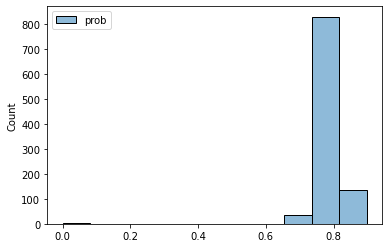

In [52]:
simulate_MC(1000, 0.95)